Objective: To create a ML model to predict whether the customer is churn or not churn

In [1]:
import pandas as pd
df=pd.read_csv(r'Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.shape

(7043, 21)

In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

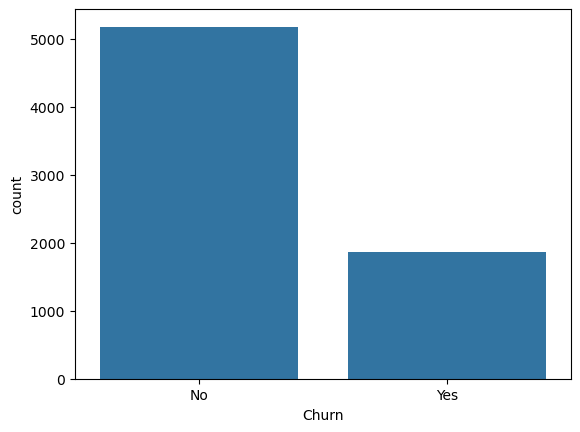

In [4]:
import seaborn as sns 
sns.countplot(data=df, x='Churn')

In [5]:
df['Churn']=df['Churn'].replace('No', 0)
df['Churn']=df['Churn'].replace('Yes', 1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_4576\2788788713.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn']=df['Churn'].replace('Yes', 1)


Split the dataset into input features and target column

In [6]:
x=df[['tenure','MonthlyCharges']] #input features
y=df['Churn'] #output column
x.head()

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70


In [7]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

Scaling the input feature data

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[0.01388889, 0.11542289],
       [0.47222222, 0.38507463],
       [0.02777778, 0.35422886],
       ...,
       [0.15277778, 0.11293532],
       [0.05555556, 0.55870647],
       [0.91666667, 0.86965174]])

In [9]:
x_scaled=pd.DataFrame(x_scaled, columns=x.columns)
x_scaled.head()

,tenure,MonthlyCharges
0,0.013889,0.115423
1,0.472222,0.385075
2,0.027778,0.354229
3,0.625000,0.239303
4,0.027778,0.521891


Divide into Train dataset and test dataset

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0) 

In [11]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5634, 2), (1409, 2), (5634,), (1409,))

In [12]:
x_test.head()

,tenure,MonthlyCharges
2200,0.263889,0.397512
4627,0.833333,0.978607
3225,0.180556,0.534328
2828,0.013889,0.021891
3768,0.763889,0.592040


In [13]:
y_test.head()

2200    0
4627    0
3225    0
2828    0
3768    0
Name: Churn, dtype: int64

Apply ML algo into training data

In [14]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

Model Prediction

In [31]:
y_proba_pred=model.predict_proba(x_test)
y_proba_pred[:5]

array([[0.7128627 , 0.2871373 ],
       [0.78419993, 0.21580007],
       [0.53439766, 0.46560234],
       [0.75599737, 0.24400263],
       [0.90571454, 0.09428546]])

In [15]:
y_pred=model.predict(x_test)
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [16]:
y_test[:5]

2200    0
4627    0
3225    0
2828    0
3768    0
Name: Churn, dtype: int64

Model Evaluation

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm=confusion_matrix(y_test, y_pred)
cm

array([[941, 100],
       [215, 153]], dtype=int64)

In [25]:
accuracy_score(y_test, y_pred)*100

77.64371894960965

Text(8.222222222222223, 0.5, 'Actual')

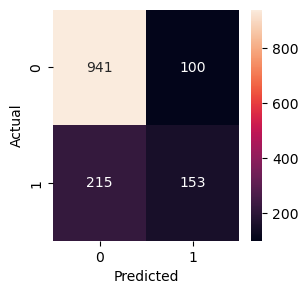

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86      1041
           1       0.60      0.42      0.49       368

    accuracy                           0.78      1409
   macro avg       0.71      0.66      0.67      1409
weighted avg       0.76      0.78      0.76      1409



In [29]:
model.score(x_test,y_test)*100

77.64371894960965

In [30]:
model.score(x_train, y_train)*100

78.6119985800497

In [33]:
model.coef_

array([[-3.96134194,  3.22629241]])

In [34]:
model.intercept_

array([-1.14646556])